# Processing data for Cleveland Healthline ZIP Codes

This notebook processes the raw data in `/data/raw/cleveland` to create the relevant CSV files in `data/processed/cleveland`. It's a rough cut of sorts to eventualaly turn into `.py` files.

Shooting for an output something like:
| Year | Income | Population | Car Ownership | ... | BRT System | Ridership |
|------|--------|------------|---------------|-----|------------|-----------|
| 2013 | 50000  | 100000     | 0.75          | ... | Cleveland   | 10000      |
| 2014 | 50000  | 100000     | 0.75          | ... | Cleveland   | 12000      |
| ...  | ...    | ...        | ...           | ... | ...        | ...       |
| 2020 | 50000  | 100000     | 0.75          | ... | Cleveland   | 15000      |

With the current structure of the raw files, each metric needs to be first aggregated so that individual columns can be created e.g.
| Year | Income |
|------|--------|
| 2013 | 50000  |
| 2014 | 50000  |
| ...  | ...    |
| 2020 | 50000  |

## Imports

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Income

In [51]:
# Load the income data
df_income = pd.read_csv('../data/raw/cleveland/income.csv', index_col=0)
df_income = df_income.rename_axis('year')
df_income

,44112,44104,44103,44106,44114
year,,,,,
2013,22220,14603,18411,22602,22180
2014,22548,15204,17616,24065,23013
2015,21608,14009,17166,23222,21324
2016,21028,14414,18531,24578,20823
2017,22147,14646,17867,25892,22304
2018,22586,15813,19540,26310,25757
2019,22412,16999,19730,29225,36182
2020,26236,16650,21468,30669,43159


In [62]:
df_income_average = df_income.mean(axis=1)
df_income_average.rename('income', inplace=True)

year
2013    20003.2
2014    20489.2
2015    19465.8
2016    19874.8
2017    20571.2
2018    22001.2
2019    24909.6
2020    27636.4
Name: income, dtype: float64

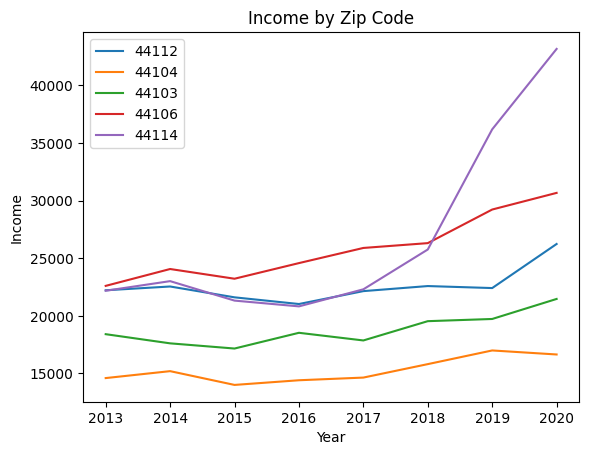

In [6]:
# Plot a chart with year on the x axis, income on the y axis, and one line for each zipcode
df_income.plot()
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income by Zip Code')
plt.show()

In [65]:
df_pop = pd.read_csv('../data/raw/cleveland/pop.csv', index_col=0)
df_pop = df_pop.rename_axis('year')

df_pop_average = df_pop.mean(axis=1)
df_pop_average.rename('pop', inplace=True)

year
2013    19078.6
2014    18902.8
2015    18673.0
2016    18490.2
2017    18273.0
2018    18077.4
2019    17924.6
2020    17717.2
Name: pop, dtype: float64

# Joining

Can repeat this for all the CSVs; they then need to be concatenated.

In [66]:
df_income_average

year
2013    20003.2
2014    20489.2
2015    19465.8
2016    19874.8
2017    20571.2
2018    22001.2
2019    24909.6
2020    27636.4
Name: income, dtype: float64

In [70]:
processed_df_cleveland = pd.concat([df_income_average, df_pop_average], axis=1)

## Joining with Ridership Data

Individual metrics have been averaged and combined into a dataframe - now relevant ridership metrics need to be pulled from the `ntd-ridership` directory. 

*Also note these system dataframes may need an additional field to denote their system for when all individual dfs are concatenated into a large df*

In [68]:
df_transit_2013 = pd.read_csv('../data/raw/ntd-ridership/transit_data_2013_filtered.csv', index_col=0)

In [73]:
df_transit_2013

,Name,ID,Org Type,SSW,Urbanized Area,UZA Population,Mode,TOS,VOMS,Vehicles Available for Maximum Service,...,Unnamed: 15,Annual Vehicle Revenue Miles,Unnamed: 17,Annual Vehicle Hours,Unnamed: 19,Annual Vehicle Revenue Hours,Unnamed: 21,Unlinked Passenger Trips,Unnamed: 23,Passenger Miles
State,,,,,,,,,,,,,,,,,,,,,
CA,Los Angeles County Metropolitan Transportation...,9154.0,Authority,N,"Los Angeles-Long Beach-Anaheim, CA",12150996.0,RB,DO,32,46,...,NaN,1915.256000,NaN,123.512000,NaN,116.638000,NaN,9118.437000,NaN,57728.945000
FL,Central Florida Regional Transportation Author...,4035.0,Authority,N,"Orlando, FL",1510516.0,RB,DO,7,9,...,NaN,140.216000,NaN,29.245000,NaN,26.812000,NaN,844.514000,NaN,615.836000
MO,Kansas City Area Transportation Authority(KCATA),7005.0,Authority,N,"Kansas City, MO-KS",1519417.0,RB,DO,11,15,...,NaN,512.874000,NaN,46.541000,NaN,44.395000,NaN,1591.117000,NaN,4311.927000
NV,Regional Transportation Commission of Southern...,9045.0,Authority,N,"Las Vegas-Henderson, NV",1886011.0,RB,PT,16,59,...,NaN,712.392000,NaN,61.517000,NaN,57.906000,NaN,4377.576000,NaN,21912.925000
NY,MTA New York City Transit(NYCT),2008.0,Subsidiary,N,"New York-Newark, NY-NJ-CT",18351295.0,RB,DO,74,90,...,NaN,1518.371000,NaN,262.694000,NaN,256.568000,NaN,19861.653000,NaN,35593.196000
OH,The Greater Cleveland Regional Transit Authori...,5015.0,Authority,N,"Cleveland, OH",1780673.0,RB,DO,16,21,...,NaN,648.031000,NaN,71.389000,NaN,69.280000,NaN,4854.519000,NaN,12837.586000
OR,Lane Transit District(LTD),7.0,Authority,N,"Eugene, OR",247421.0,RB,DO,8,11,...,NaN,423.727000,NaN,35.933000,NaN,35.502000,NaN,2707.309000,NaN,7840.004000
NaN,Bus Rapid Transit - Directly Operated,NaN,NaN,NaN,NaN,NaN,RB,DO,148,192,...,NaN,5.158475,NaN,0.569314,NaN,0.549195,NaN,38.977549,NaN,118.927494
NaN,Bus Rapid Transit - Purchased Transportation,NaN,NaN,NaN,NaN,NaN,RB,PT,16,59,...,NaN,0.712392,NaN,0.061517,NaN,0.057906,NaN,4.377576,NaN,21.912925


In [ ]:
locations_dict = {
    'cleveland': 'OH',
    'houston': 'TX',
    'kansas': 'KS',
    'richmond': 'VA',
    'indianapolis': 'IN',
    'eugene': 'OR',
    'albuquerque': 'NM',
    'aspen': 'CO',
    'fort_collins': 'CO',
    'hartford': 'CT',
    'grand_rapids': 'MI',
    'orlando': 'FL',
    'boston': 'MA',
    'los_angeles': 'CA'
}

need to somehow use these locations to grab the relevant row from each transit csv
- 2013 and 14 are different, slightly longer strings on `Urbanized Area`
- 2015 onward might be easier, can double match on state and city (with some slight modifications)

In [71]:
curr_name = 'cleveland'

In [85]:
# df_transit_2013[df_transit_2013["Urbanized Area"].str.contains(curr_name)]
filtered_df = df_transit_2013[df_transit_2013["Urbanized Area"].str.contains(curr_name, na=False, case=False)]

In [97]:
cols = ['Unlinked Passenger Trips', 'UZA Population', 'Mode VOMS', 'VOMS', 'Annual Vehicle Revenue Miles']

cle = filtered_df.loc[:, filtered_df.columns.isin(cols)]

In [94]:
years = list(range(2013, 2021))
cols = ['Unlinked Passenger Trips', 'UZA Population', 'Mode VOMS', 'VOMS', 'Annual Vehicle Revenue Miles']
res_df = pd.DataFrame(columns = cols, index = years)

In [113]:
res_df

,Unlinked Passenger Trips,UZA Population,Mode VOMS,VOMS,Annual Vehicle Revenue Miles
2013,4854.519,1780673.0,NaN,16,648.031
2014,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN


In [112]:
for col in cols:
    try:
        res_df.at[2013, col] = cle[col][0]
    except:
        res_df.at[2013, col] = np.NaN

In [80]:
locations = ['cleveland', 'houston', 'kansas', 'richmond', 'indianapolis', 'eugene', 'albuquerque', 'aspen', 'fort_collins', 'hartford', 'grand_rapids', 'orlando', 'boston', 'los_angeles']

for location in locations:
    print(df_transit_2013[df_transit_2013["Urbanized Area"].str.contains(location, na=False, case=False)])

                                                    Name      ID   Org Type   
State                                                                         
OH     The Greater Cleveland Regional Transit Authori...  5015.0  Authority  \

      SSW Urbanized Area  UZA Population Mode TOS  VOMS   
State                                                     
OH      N  Cleveland, OH       1780673.0   RB  DO    16  \

       Vehicles Available for Maximum Service  ...  Unnamed: 15   
State                                          ...                
OH                                         21  ...          NaN  \

       Annual Vehicle Revenue Miles  Unnamed: 17  Annual Vehicle Hours   
State                                                                    
OH                          648.031          NaN                71.389  \

       Unnamed: 19  Annual Vehicle Revenue Hours  Unnamed: 21   
State                                                           
OH             NaN           

In [82]:
test = 'Grand Rapids'

test.contains('grand_rapids')

AttributeError: 'str' object has no attribute 'contains'

In [84]:
'aspen_westcliffe_glenwood_springs'.replace("_", " ")

'aspen westcliffe glenwood springs'

In [180]:
kansas = pd.read_csv('../data/processed/kansas.csv')
# kansas['Primary UZA\n Population']
# kansas.rename(columns={'Primary UZA\n Population': 'Primary UZA Population'}, inplace=True)

In [181]:
kansas['UZA Population'].update(kansas.pop('Primary UZA Population'))
kansas['VOMS'].update(kansas.pop('Mode VOMS'))
kansas['Vehicle Revenue Miles'].update(kansas.pop('Annual Vehicle Revenue Miles'))

KeyError: 'UZA Population'

In [182]:
kansas

,Unnamed: 0,income,pop,age,house_married,house_nonfam,house_m_single,house_f_single,car,biz,unlinked_passenger_trips,uza_population,voms,vehicle_revenue_miles
0,2013,45802.875000,12430.750,34.8125,26.2500,56.3250,3.4750,13.9250,51.1500,564.125,1591.117,1519417.0,11.0,512.874
1,2014,47554.714286,12435.000,34.7500,26.2000,57.6500,3.4875,12.6750,50.3875,584.875,"1,545.40","1,519,417",11.0,512.300
2,2015,50107.750000,12690.875,34.7250,26.8750,57.9000,3.4000,11.8250,49.6375,604.625,1435736,1519417,11.0,512787.000
3,2016,51233.250000,12784.750,34.2750,26.8375,59.1250,2.9375,11.1000,44.8500,622.875,1350482,1519417,11.0,518198.000
4,2017,53880.375000,12935.625,34.6500,27.4375,59.2500,2.7750,10.5125,41.7125,584.500,1240926,1519417,12.0,498988.000
5,2018,57611.375000,13127.625,34.7875,27.8125,58.7125,2.7250,10.7500,37.8375,595.625,1160189,1519417,11.0,455147.000
6,2019,58913.500000,13253.000,34.5125,28.4625,58.8750,2.7250,9.9625,38.0375,NaN,1109564.0,1519417.0,11.0,455528.000
7,2020,63147.875000,13579.750,34.1875,28.2125,59.0625,2.7500,9.9875,37.3500,NaN,786333,1519417,9.0,345827.000


**broken:** 2014 data is off by factor of 10?

In [127]:
kansas.columns= kansas.columns.str.lower()
kansas.columns = kansas.columns.str.replace(' ', '_')


In [142]:
kansas

,unnamed:_0,income,pop,age,house_married,house_nonfam,house_m_single,house_f_single,car,biz,unlinked_passenger_trips,uza_population,voms,vehicle_revenue_miles
0,2013,45802.875000,12430.750,34.8125,26.2500,56.3250,3.4750,13.9250,51.1500,564.125,1591.117,1519417.0,11.0,512.874
1,2014,47554.714286,12435.000,34.7500,26.2000,57.6500,3.4875,12.6750,50.3875,584.875,1545.400,1519417,11.0,512.300
2,2015,50107.750000,12690.875,34.7250,26.8750,57.9000,3.4000,11.8250,49.6375,604.625,1435736.000,1519417.0,11.0,512787.000
3,2016,51233.250000,12784.750,34.2750,26.8375,59.1250,2.9375,11.1000,44.8500,622.875,1350482.000,1519417.0,11.0,518198.000
4,2017,53880.375000,12935.625,34.6500,27.4375,59.2500,2.7750,10.5125,41.7125,584.500,1240926.000,1519417.0,12.0,498988.000
5,2018,57611.375000,13127.625,34.7875,27.8125,58.7125,2.7250,10.7500,37.8375,595.625,1160189.000,1519417.0,11.0,455147.000
6,2019,58913.500000,13253.000,34.5125,28.4625,58.8750,2.7250,9.9625,38.0375,NaN,1109564.000,1519417.0,11.0,455528.000
7,2020,63147.875000,13579.750,34.1875,28.2125,59.0625,2.7500,9.9875,37.3500,NaN,786333.000,1519417.0,9.0,345827.000


In [186]:
# passenger trips and uza pop are objects for some reason

kansas.replace(',','', regex=True, inplace=True)

In [187]:
kansas = kansas.astype({'unlinked_passenger_trips':'float'})

In [188]:
kansas = kansas.astype({'uza_population':'float'})

In [189]:
kansas.dtypes

Unnamed: 0                    int64
income                      float64
pop                         float64
age                         float64
house_married               float64
house_nonfam                float64
house_m_single              float64
house_f_single              float64
car                         float64
biz                         float64
unlinked_passenger_trips    float64
uza_population              float64
voms                        float64
vehicle_revenue_miles       float64
dtype: object

In [190]:
mean = kansas.mean()
std = kansas.std()

In [194]:
mean.unlinked_passenger_trips

885795.814625

In [206]:
# kansas[abs(kansas - mean) > std]['unlinked_passenger_trips'] * 1000

kansas.loc[abs(kansas['unlinked_passenger_trips'] - mean.unlinked_passenger_trips) > std.unlinked_passenger_trips, 'unlinked_passenger_trips'] *= 1000

In [209]:
kansas.loc[abs(kansas['vehicle_revenue_miles'] - mean.vehicle_revenue_miles) > std.vehicle_revenue_miles, 'vehicle_revenue_miles'] *= 1000

In [210]:
kansas

,Unnamed: 0,income,pop,age,house_married,house_nonfam,house_m_single,house_f_single,car,biz,unlinked_passenger_trips,uza_population,voms,vehicle_revenue_miles
0,2013,45802.875000,12430.750,34.8125,26.2500,56.3250,3.4750,13.9250,51.1500,564.125,1591117.0,1519417.0,11.0,512874.0
1,2014,47554.714286,12435.000,34.7500,26.2000,57.6500,3.4875,12.6750,50.3875,584.875,1545400.0,1519417.0,11.0,512300.0
2,2015,50107.750000,12690.875,34.7250,26.8750,57.9000,3.4000,11.8250,49.6375,604.625,1435736.0,1519417.0,11.0,512787.0
3,2016,51233.250000,12784.750,34.2750,26.8375,59.1250,2.9375,11.1000,44.8500,622.875,1350482.0,1519417.0,11.0,518198.0
4,2017,53880.375000,12935.625,34.6500,27.4375,59.2500,2.7750,10.5125,41.7125,584.500,1240926.0,1519417.0,12.0,498988.0
5,2018,57611.375000,13127.625,34.7875,27.8125,58.7125,2.7250,10.7500,37.8375,595.625,1160189.0,1519417.0,11.0,455147.0
6,2019,58913.500000,13253.000,34.5125,28.4625,58.8750,2.7250,9.9625,38.0375,NaN,1109564.0,1519417.0,11.0,455528.0
7,2020,63147.875000,13579.750,34.1875,28.2125,59.0625,2.7500,9.9875,37.3500,NaN,786333.0,1519417.0,9.0,345827.0
